In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dir = 'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\flowers\\flowers\\train'  
test_dir = 'D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\flowers\\flowers\\test'    

In [3]:
# Step 1: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data using the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as per the model requirements
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3250 images belonging to 5 classes.
Found 530 images belonging to 5 classes.


In [4]:
# Step 2: Load Pre-trained Model with Transfer Learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model layers

In [5]:
# Step 3: Add Custom Layers for Classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [6]:
# Step 4: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(
    train_generator,
    epochs=10,  # Set to higher number like 20-30 for better results
    validation_data=test_generator
)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6631 - loss: 0.8681

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.6641 - loss: 0.8657 - val_accuracy: 0.8585 - val_loss: 0.4197
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.8556 - loss: 0.3790 - val_accuracy: 0.8811 - val_loss: 0.3530
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8847 - loss: 0.3160 - val_accuracy: 0.8774 - val_loss: 0.3609
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9021 - loss: 0.2868 - val_accuracy: 0.8604 - val_loss: 0.4001
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9073 - loss: 0.2578 - val_accuracy: 0.8774 - val_loss: 0.3635
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.9127 - loss: 0.2445 - val_accuracy: 0.9019 - val_loss: 0.2927
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.9216 - loss: 0.2172 - val_accuracy: 0.8943 - val_loss: 0.2904
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.9242 - loss: 0.2186 - val_accuracy: 0.894

In [7]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 768ms/step - accuracy: 0.8998 - loss: 0.2777
Test accuracy: 0.8999999761581421
Test Loss: 0.27239105105400085


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


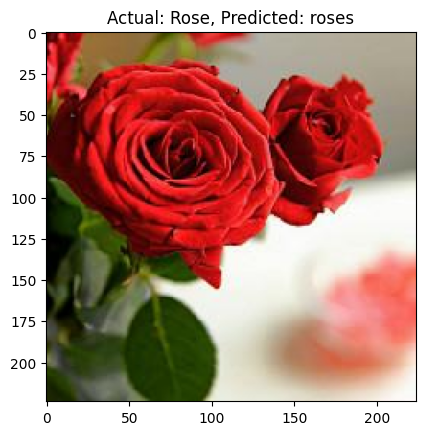

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def display_prediction(image_path, actual_label):
    
    # Load the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.imshow(img)
    

    # Set title with actual and predicted labels
    if actual_label is not None:
        plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    else:
        plt.title(f'Predicted: {predicted_label}')

    plt.show()


display_prediction('D:\\Fourth_Year\\DL\\Deep Learning - Datasets\\flowers\\flowers\\test\\roses\\roses_112.jpg', actual_label='Rose')  

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


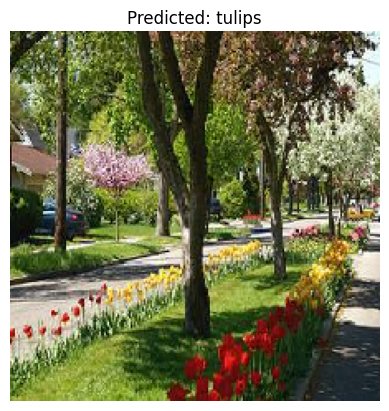

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


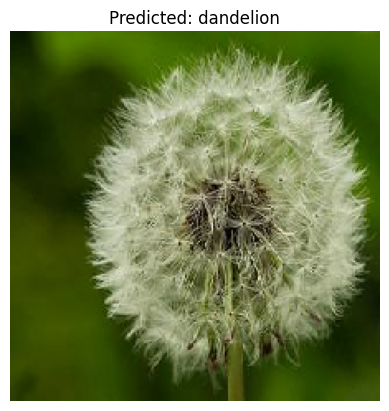

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


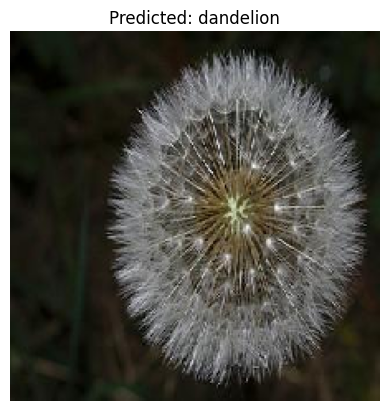

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


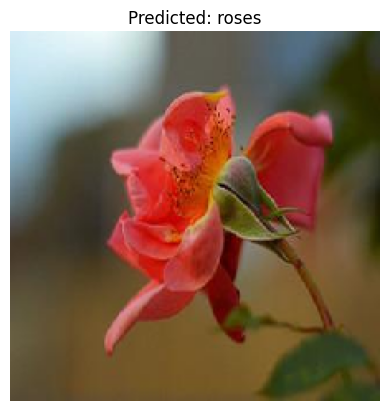

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


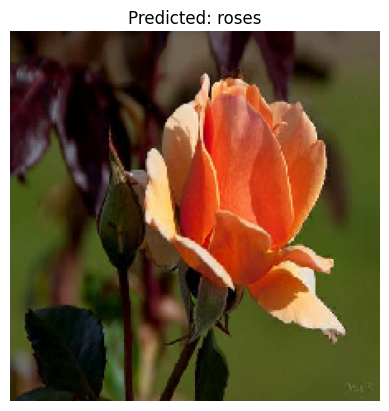

In [33]:
# Step 7: Visualize Predictions
class_labels = list(train_generator.class_indices.keys())
num_images_to_show = 5

# Use the generator to load images in batches
images, labels = next(test_generator)  # Get one batch of images and labels

for i in range(num_images_to_show):
    img = images[i]  # Extract an individual image from the batch
    plt.imshow(img)
    plt.axis('off')
    
    # Expand dimensions to create a batch of size 1
    img_batch = np.expand_dims(img, axis=0)
    
    # Make predictions
    prediction = model.predict(img_batch)
    predicted_index = np.argmax(prediction)
    
    # Ensure the predicted index is within the range of class_labels
    if predicted_index < len(class_labels):
        predicted_label = class_labels[predicted_index]
    else:
        predicted_label = "Unknown"
    
    plt.title(f"Predicted: {predicted_label}")
    plt.show()
